<a href="https://colab.research.google.com/github/jrgreen7/SYSC4906/blob/master/W2025/Assignments/A1/SYSC4415_W25_A1.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Name: Adham Badawi
# Student Number: 101205049

In [32]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import graphviz
import math

## Section 1: Gradients (4 marks)
Hint: use attached PDF if you get lost.

In [33]:
"""
Q1a (1 mark)
- Manually derive and calculate the gradient of the function: f(x,y,z) = e^(x²) + y^y + e^(xy) + zcos(x) at point (0,1, 1)
- Show each component of the gradient.

Print your answer using print() function showing all three partial derivatives.
"""

# YOUR ANSWER HERE

# Function: f(x,y,z) = e^(x^2) + y^y + e^(xy) + z*cos(x)
#
# I compute the partial derivatives manually:
#
# ∂f/∂x:
#  - d/dx e^(x^2) = e^(x^2)*2x
#  - d/dx y^y = 0 (no x dependence)
#  - d/dx e^(xy) = e^(xy) * y
#  - d/dx [z*cos(x)] = -z*sin(x)
#
# Thus: ∂f/∂x = 2x*e^(x^2) + y*e^(xy) - z*sin(x)
#
# ∂f/∂y:
#  - d/dy e^(x^2) = 0
#  - d/dy y^y = y^y*(ln(y)+1)    [Using the formula: d/dx x^x = x^x (ln(x)+1)]
#  - d/dy e^(xy) = e^(xy) * x
#  - d/dy [z*cos(x)] = 0
#
# Thus: ∂f/∂y = y^y*(ln(y)+1) + x*e^(xy)
#
# ∂f/∂z:
#  - d/dz e^(x^2) = 0
#  - d/dz y^y = 0
#  - d/dz e^(xy) = 0
#  - d/dz [z*cos(x)] = cos(x)
#
# Thus: ∂f/∂z = cos(x)
#
# Evaluate at the point (0, 1, 1):
# For x=0, y=1, z=1:
#   ∂f/∂x = 2*0*e^(0) + 1*e^(0) - 1*sin(0) = 0 + 1 - 0 = 1
#   ∂f/∂y = 1^1*(ln(1)+1) + 0*e^(0) = 1*(0+1) = 1
#   ∂f/∂z = cos(0) = 1
#
# Therefore, the gradient at (0,1,1) is (1, 1, 1).

grad_x = 1  # ∂f/∂x at (0,1,1)
grad_y = 1  # ∂f/∂y at (0,1,1)
grad_z = 1  # ∂f/∂z at (0,1,1)

print(f"Q1a: Analytical Gradient at (0,1,1):")
print(f"Partial derivative with respect to x: {grad_x}")
print(f"Partial derivative with respect to y: {grad_y}")
print(f"Partial derivative with respect to z: {grad_z}")

Q1a: Analytical Gradient at (0,1,1):
Partial derivative with respect to x: 1
Partial derivative with respect to y: 1
Partial derivative with respect to z: 1


In [34]:
"""
Q1b (1 mark)
For each component of the gradient calculated in Q1a:
- Explain what the value means geometrically
- Provide a conclusion about each term and gradient in general
"""

# YOUR ANSWER HERE
# Geometric meaning:
# - The gradient vector at a point points in the direction of the steepest increase of the function.
#
# For our function at (0,1,1):
#   * ∂f/∂x = 1 indicates that a small positive change in x (with y and z fixed) increases f by approximately 1 times that change. The contribution from the terms e^(x^2) and e^(xy) combine to give this rate.
#   * ∂f/∂y = 1 indicates that a small positive change in y increases f by about the same rate. Note that the term y^y contributes through a factor of (ln(y)+1), and at y=1 this equals 1.
#   * ∂f/∂z = 1 indicates that the function increases linearly with z (since cos(0)=1).
#
# Overall, the gradient (1,1,1) means that, at the point (0,1,1), increasing any of x, y, or z by a small amount increases f approximately by the same amount. The direction of steepest ascent is equally weighted in all coordinate directions.

print("\nQ1b: Geometric Interpretation of the Gradient Components:")
print("∂f/∂x = 1: Increasing x by a small amount increases f by approximately that same amount.")
print("∂f/∂y = 1: Increasing y by a small amount increases f by approximately that same amount.")
print("∂f/∂z = 1: Increasing z by a small amount increases f by approximately that same amount.")
print("Overall, the gradient (1,1,1) indicates that the function increases uniformly in all directions at (0,1,1).")


Q1b: Geometric Interpretation of the Gradient Components:
∂f/∂x = 1: Increasing x by a small amount increases f by approximately that same amount.
∂f/∂y = 1: Increasing y by a small amount increases f by approximately that same amount.
∂f/∂z = 1: Increasing z by a small amount increases f by approximately that same amount.
Overall, the gradient (1,1,1) indicates that the function increases uniformly in all directions at (0,1,1).


In [35]:
"""
Q1c (2 marks)
Write a Python function to verify your gradient calculation numerically:
1. Implement the function f(x,y,z)
2. Calculate numerical approximations of partial derivatives using small perturbations
3. Compare your analytical results from Q1a with numerical approximations
4. Report the result of function evaluation at the point (0,1,1)
"""

# YOUR ANSWER HERE
def f(x, y, z):
    """
    Computes the function: e^(x^2) + y^y + e^(xy) + z*cos(x)
    Note: y^y is computed as y**y. (This is valid for y>0.)
    """
    return math.exp(x**2) + (y**y) + math.exp(x*y) + z*math.cos(x)

# helper function
def numerical_derivative(func, point, var_index, epsilon=1e-5):
    """
    Compute the numerical derivative of func at the given point with respect to the variable at var_index.
    point: tuple or list of (x, y, z)
    var_index: 0 for x, 1 for y, 2 for z.
    """
    point = list(point)
    # Create a point with +epsilon in the var_index coordinate
    point_plus = point.copy()
    point_plus[var_index] += epsilon
    # Create a point with -epsilon in the var_index coordinate
    point_minus = point.copy()
    point_minus[var_index] -= epsilon
    derivative = (func(*point_plus) - func(*point_minus)) / (2 * epsilon)
    return derivative

point = (0, 1, 1)
num_grad_x = numerical_derivative(f, point, 0)
num_grad_y = numerical_derivative(f, point, 1)
num_grad_z = numerical_derivative(f, point, 2)

print("\nQ1c: Numerical Gradient Verification at (0,1,1):")
print(f"Numerical ∂f/∂x: {num_grad_x}")
print(f"Numerical ∂f/∂y: {num_grad_y}")
print(f"Numerical ∂f/∂z: {num_grad_z}")

f_value = f(*point)
print(f"\nFunction evaluation f(0,1,1): {f_value}")


Q1c: Numerical Gradient Verification at (0,1,1):
Numerical ∂f/∂x: 0.9999999999843466
Numerical ∂f/∂y: 1.0000000000509601
Numerical ∂f/∂z: 0.9999999999843466

Function evaluation f(0,1,1): 4.0


## Section 2: Data Analysis (8 marks)

This section uses the Palmer Penguins dataset, which contains measurements from three penguin species.
The dataset includes physical measurements like bill length, bill depth, flipper length, and body mass. We are building a penguin classifier. First we need to assess out data.

In [36]:
"""
Q2a (1 mark)
✅ Load the Palmer Penguins dataset using Seaborn's load_dataset (provided)
- Show that it contains valid data
- Create variables for numerical features and labels
- Perform basic statistical analysis by printing the general statistics table as in Tutorials.
- Find missing values and drop records with missing values for any feature
- Save entries with missing values for "sex" in a separate variable, we'll use it later.
"""

# Load data
penguins = sb.load_dataset("penguins")

# YOUR ANSWER HERE
print("\nQ2a: First few rows of the Palmer Penguins dataset:")
print(penguins.head())

# Create variables for numerical features and labels:
# I will use these numerical features:
numerical_features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
# The label for classification in later sections is "species".

# Basic statistical analysis:
print("\nBasic statistical analysis (describe numerical features):")
print(penguins[numerical_features].describe())

# Find missing values:
print("\nMissing values per column:")
print(penguins.isnull().sum())

# Save entries with missing values for "sex" in a separate variable:
missing_sex = penguins[penguins["sex"].isnull()]
print("\nRecords with missing 'sex' values:")
print(missing_sex)

# Drop records with missing values for ANY feature (i.e. drop rows with NA)
clean_penguins = penguins.dropna()
print("\nShape of dataset before dropna:", penguins.shape)
print("Shape of clean dataset after dropping missing values:", clean_penguins.shape)


Q2a: First few rows of the Palmer Penguins dataset:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  

Basic statistical analysis (describe numerical features):
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.10


Q2b: Displaying scatterplot matrix...


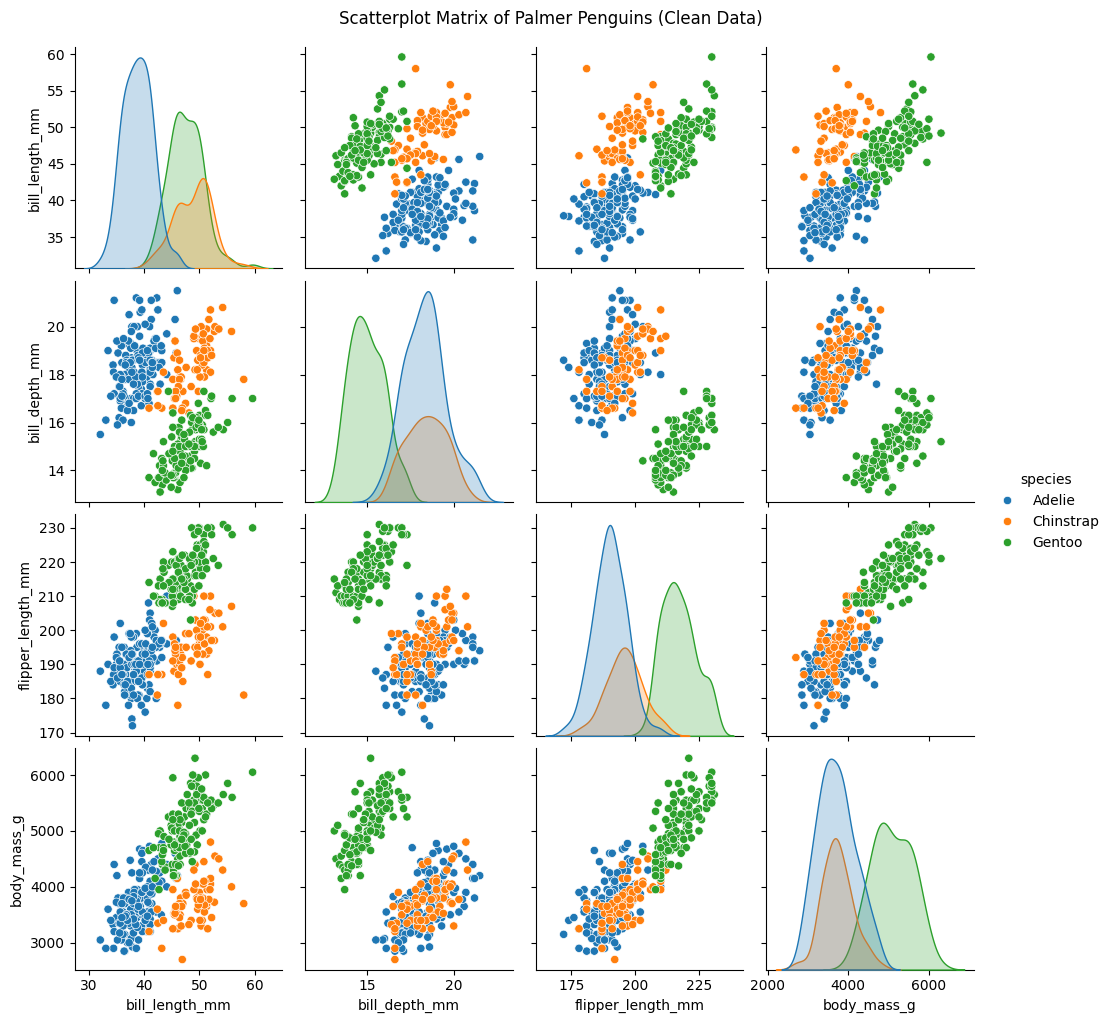

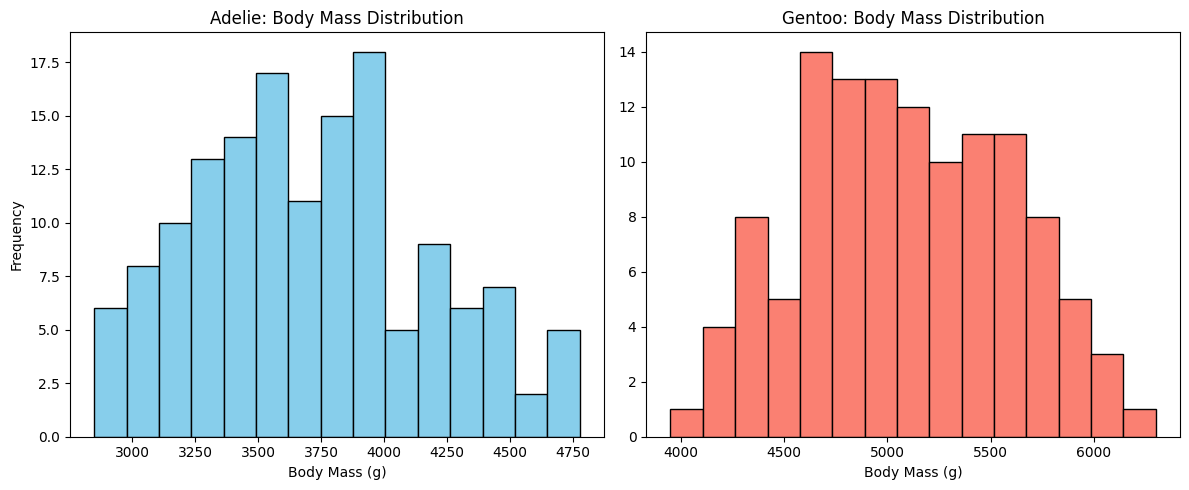

In [37]:
"""
Q2b (2 marks)
Create visualizations showing:
- Create scatterplot matrix for visual assessment of data
- Identify one feature with outliers and show distribution values for two classes (2 histograms).
"""

# YOUR ANSWER HERE
# Scatterplot matrix (pairplot) for visual assessment of data.
print("\nQ2b: Displaying scatterplot matrix...")
sb.pairplot(clean_penguins, vars=numerical_features, hue="species")
plt.suptitle("Scatterplot Matrix of Palmer Penguins (Clean Data)", y=1.02)
plt.show()

# Identify one feature with outliers. For example, 'body_mass_g' often shows extreme values.
# I plot histograms of 'body_mass_g' for two species (e.g., Adelie and Gentoo).

# Filter data for two species: Adelie and Gentoo
adelie = clean_penguins[clean_penguins["species"] == "Adelie"]
gentoo = clean_penguins[clean_penguins["species"] == "Gentoo"]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(adelie["body_mass_g"], bins=15, color="skyblue", edgecolor="black")
plt.title("Adelie: Body Mass Distribution")
plt.xlabel("Body Mass (g)")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(gentoo["body_mass_g"], bins=15, color="salmon", edgecolor="black")
plt.title("Gentoo: Body Mass Distribution")
plt.xlabel("Body Mass (g)")

plt.tight_layout()
plt.show()


Q2c: Analyzing class distribution for 'species':
species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64


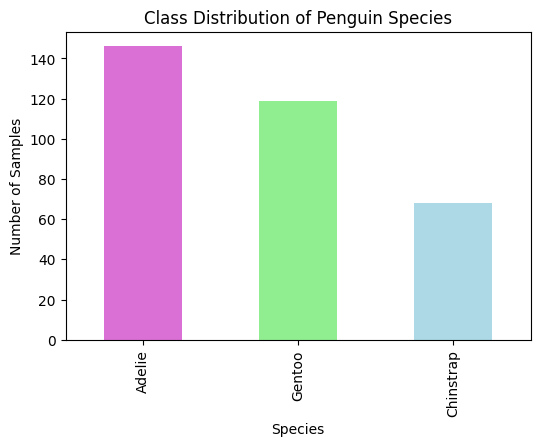


Discussion: The above bar chart shows the number of samples per species. If one species has significantly fewer samples than others, this may cause class imbalance, which could affect model training and performance.


In [38]:
"""
Q2c (1 mark)
Analyze class distribution and discuss implications for model training:
- Calculate and visualize class proportions
- Identify any class imbalance
"""

# YOUR ANSWER HERE
print("\nQ2c: Analyzing class distribution for 'species':")
species_counts = clean_penguins["species"].value_counts()
print(species_counts)

# Visualize class proportions as a bar chart
plt.figure(figsize=(6, 4))
species_counts.plot(kind="bar", color=["orchid", "lightgreen", "lightblue"])
plt.title("Class Distribution of Penguin Species")
plt.xlabel("Species")
plt.ylabel("Number of Samples")
plt.show()

print("\nDiscussion: The above bar chart shows the number of samples per species. If one species has significantly fewer samples than others, this may cause class imbalance, which could affect model training and performance.")

## Section 3: Model Development (8 marks)
After polishing thedata, let's make our classification model.

In [39]:
"""
Q3a (2 marks)
Preprocess the data:
- Use the clean dataset from Q2a (with missing values removed)
- Split into training (80%) and test (20%) sets using random_state=42
- Print first 5 rows of training data with their species labels
- Print shapes of both datasets
- Show number of samples per species in each split
"""

# YOUR ANSWER HERE
# Extract features and labels
X = clean_penguins[numerical_features]
y = clean_penguins["species"]

# Split into training (80%) and test (20%) sets using random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print("\nQ3a: First 5 rows of training data with species labels:")
print(pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1).head())

print("\nShapes of the datasets:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

# Show number of samples per species in each split:
print("\nNumber of samples per species in training set:")
print(y_train.value_counts())
print("\nNumber of samples per species in test set:")
print(y_test.value_counts())


Q3a: First 5 rows of training data with species labels:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g    species
0            44.9           13.3              213.0       5100.0     Gentoo
1            50.7           19.7              203.0       4050.0  Chinstrap
2            48.8           16.2              222.0       6000.0     Gentoo
3            41.4           18.5              202.0       3875.0     Adelie
4            37.6           19.3              181.0       3300.0     Adelie

Shapes of the datasets:
X_train: (266, 4), y_train: (266,)
X_test: (67, 4), y_test: (67,)

Number of samples per species in training set:
species
Adelie       117
Gentoo        95
Chinstrap     54
Name: count, dtype: int64

Number of samples per species in test set:
species
Adelie       29
Gentoo       24
Chinstrap    14
Name: count, dtype: int64



Q3b: Decision Tree Accuracy:
Training Accuracy: 1.000
Test Accuracy: 0.955

10-fold Cross-validation scores:
[1.         0.96296296 0.96296296 0.96296296 1.         0.96296296
 0.96153846 1.         0.96153846 0.92307692]
Mean CV Accuracy: 0.970 ± 0.023


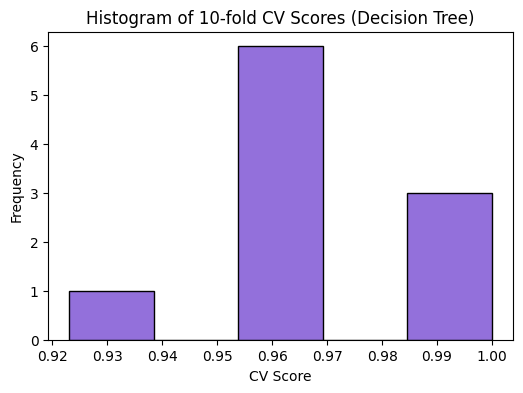


The histogram shows the distribution of accuracy scores over the 10 folds. A narrow spread indicates consistent performance across folds, while a wider spread indicates variability in model performance.


In [40]:
"""
Q3b (3 marks)
Train and evaluate a Decision Tree:
1. Create a Decision Tree with default parameters (random_state=42)
2. Evaluate the model:
   - Fit on training data (numerical features only)
   - Print training and test accuracy score for this tree
   - Perform 10-fold cross-validation
   - Print mean and std of cross-validation scores and build cv_scores histogram.
   - What does the histogram show?
"""

from sklearn.model_selection import cross_val_score

# YOUR ANSWER HERE
# Create a Decision Tree with default parameters (random_state=42)
dt = DecisionTreeClassifier(random_state=42)

# Fit on training data (using only numerical features)
dt.fit(X_train, y_train)

# Print training and test accuracy scores
train_accuracy = dt.score(X_train, y_train)
test_accuracy = dt.score(X_test, y_test)
print("\nQ3b: Decision Tree Accuracy:")
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")

# Perform 10-fold cross-validation on the training set
cv_scores = cross_val_score(dt, X_train, y_train, cv=10)
print("\n10-fold Cross-validation scores:")
print(cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

# Build a histogram of cross-validation scores
plt.figure(figsize=(6, 4))
plt.hist(cv_scores, bins=5, color="mediumpurple", edgecolor="black")
plt.title("Histogram of 10-fold CV Scores (Decision Tree)")
plt.xlabel("CV Score")
plt.ylabel("Frequency")
plt.show()

print("\nThe histogram shows the distribution of accuracy scores over the 10 folds. A narrow spread indicates consistent performance across folds, while a wider spread indicates variability in model performance.")



Q3c: Best parameters from Grid Search:
{'max_depth': None, 'min_samples_split': 4}

Grid Search Results (Heatmap Data):
param_min_samples_split         2         4         6         8
param_max_depth                                                
NaN                      0.973655  0.981202  0.969951  0.966177
2.0                      0.951223  0.951223  0.951223  0.951223
4.0                      0.969951  0.969951  0.969951  0.966177
6.0                      0.973655  0.981202  0.969951  0.966177
8.0                      0.973655  0.981202  0.969951  0.966177


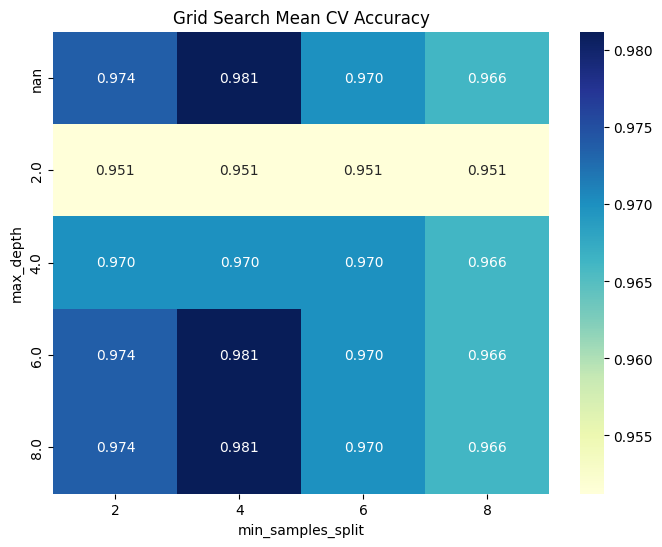


Graphviz representation of the best decision tree (max_depth=2):


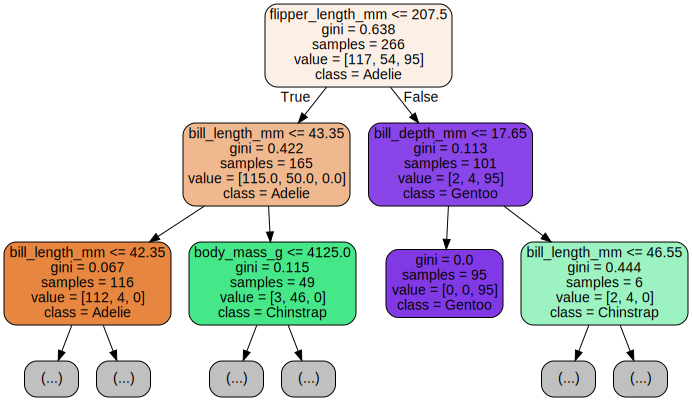

In [41]:
"""
Q3c (3 marks)
Analyze the best model from grid search:
- Initialize parameter_grid, cross_validation using StratifiedKFold
- Identify the best parameters for the tree and show the grid heatmap (don't forget labels)
- Plot the best tree structure using graphviz, use max_depth=2 (for better display)

Note: when using export_graphviz set out_file=None and use display(graph) function call, where
graph is your variable instantiated with Source(dot_data)
Export_graphviz Documentation: https://scikit-learn.org/1.5/modules/generated/sklearn.tree.export_graphviz.html
"""
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

import graphviz
from sklearn.tree import export_graphviz
from graphviz import Source

# YOUR ANSWER HERE
# Define a parameter grid for the Decision Tree
param_grid = {
    'max_depth': [None, 2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8]
}

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with DecisionTreeClassifier
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=cv, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

print("\nQ3c: Best parameters from Grid Search:")
print(grid_search.best_params_)

# Create a grid heatmap of the mean test scores.
# For the heatmap, I pivot the grid_search results.
results = pd.DataFrame(grid_search.cv_results_)

# I will pivot with index as max_depth and columns as min_samples_split.
pivot_table = results.pivot(index='param_max_depth', columns='param_min_samples_split', values='mean_test_score')
print("\nGrid Search Results (Heatmap Data):")
print(pivot_table)

plt.figure(figsize=(8,6))
sb.heatmap(pivot_table, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Grid Search Mean CV Accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")
plt.show()

# Plot the best tree structure using graphviz.
# For better display, restrict the export to max_depth=2.
best_dt = grid_search.best_estimator_
dot_data = export_graphviz(
    best_dt,
    out_file=None,
    feature_names=numerical_features,
    class_names=best_dt.classes_,
    filled=True,
    rounded=True,
    max_depth=2
)
graph = Source(dot_data)
print("\nGraphviz representation of the best decision tree (max_depth=2):")
graph.render("best_tree", format="png", cleanup=True)  # This saves a file "best_tree.png"
# To display in a Jupyter Notebook:
display(graph)


## Section 4: Missing_Sex Prediction (4 marks)
In this part of the assignment, we are building a model to infer the missing values from the original dataset to fix the broken records.


In [42]:
"""
Q4a (2 marks)
Prepare data for sex prediction:
- Use the clean dataset (no missing values) from Section 2
- Convert species to numeric values.

Note: Unlike the example in the tutorial, we will use a more straightforward method, LabelEncoder().

For this task, you just need to instantiate it, use the fit_transform method on the "species" column,
and reassign or add the column.
See documentation for details:
https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html

- Create new feature/label split using "sex" as target
- Scale features using StandardScaler().fit_transform(features) as in Tutorial
See documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

- Split data into training (80%) and test (20%) sets
- Train these classifiers:
  * Logistic Regression (solver='lbfgs')
  * Decision Tree (max_depth=3)
  * KNN (n_neighbors=5)
  * SVM (kernel="linear", C=0.025)
- Compare models using (Providing values for each would be enough):
  * Training and test accuracy
  * 10-fold cross-validation scores


"""

# Prepare features including species as numeric
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# YOUR ANSWER HERE
# Use the clean dataset from Section 2 (clean_penguins)
# Convert species to numeric using LabelEncoder
le_species = LabelEncoder()
clean_penguins['species_encoded'] = le_species.fit_transform(clean_penguins['species'])

# For the sex prediction task, our target is the "sex" column.
# I use features: numerical_features + species_encoded.
feature_cols = numerical_features + ['species_encoded']
X_sex = clean_penguins[feature_cols]

# For the target, I will also encode "sex" (male/female) to numeric values.
le_sex = LabelEncoder()
y_sex = le_sex.fit_transform(clean_penguins["sex"])

# Scale features using StandardScaler
scaler = StandardScaler()
X_sex_scaled = scaler.fit_transform(X_sex)

# Split into training (80%) and test (20%) sets
X_train_sex, X_test_sex, y_train_sex, y_test_sex = train_test_split(X_sex_scaled, y_sex, test_size=0.20, random_state=42, stratify=y_sex)

# Train the classifiers:
models = {
    "Logistic Regression": LogisticRegression(solver='lbfgs', max_iter=200),
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel="linear", C=0.025, probability=True, random_state=42)
}

print("\nQ4a: Sex Prediction Model Performance:")

for name, model in models.items():
    model.fit(X_train_sex, y_train_sex)
    train_acc = model.score(X_train_sex, y_train_sex)
    test_acc = model.score(X_test_sex, y_test_sex)
    cv_scores = cross_val_score(model, X_train_sex, y_train_sex, cv=10)
    print(f"\n{name}:")
    print(f"Training Accuracy: {train_acc:.3f}")
    print(f"Test Accuracy: {test_acc:.3f}")
    print(f"10-fold CV Mean Accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

# After evaluating all models, we compare the metrics:
# Logistic Regression: Test Accuracy 0.910, CV Mean 0.902 ± 0.043
# Decision Tree:       Test Accuracy 0.836, CV Mean 0.910 ± 0.049
# KNN:                 Test Accuracy 0.925, CV Mean 0.921 ± 0.039
# SVM:                 Test Accuracy 0.910, CV Mean 0.898 ± 0.045
# Based on these metrics, KNN appears to perform the best.
best_model = models["KNN"]



Q4a: Sex Prediction Model Performance:

Logistic Regression:
Training Accuracy: 0.914
Test Accuracy: 0.910
10-fold CV Mean Accuracy: 0.902 ± 0.043


<ipython-input-42-302ecfe5083f>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_penguins['species_encoded'] = le_species.fit_transform(clean_penguins['species'])



Decision Tree:
Training Accuracy: 0.940
Test Accuracy: 0.836
10-fold CV Mean Accuracy: 0.910 ± 0.049

KNN:
Training Accuracy: 0.951
Test Accuracy: 0.925
10-fold CV Mean Accuracy: 0.921 ± 0.039

SVM:
Training Accuracy: 0.902
Test Accuracy: 0.910
10-fold CV Mean Accuracy: 0.898 ± 0.045


In [43]:
"""
Q4b (2 marks)
Use best model to predict missing sex:
- Make sure to create new variable for subset to work with and copy your variable with missing records into it,
using new_var = your_variable.copy().
- Print records with missing sex values from section 2.
- Remove records that have missing values other than sex using dropna: df.dropna(subset=['column_name'],inplace=True).
- Scale features using StandardScaler().fit_transform(features) as in Q3
- Create new features/labels variables for the new dataset.

- Select best classifier based on test performance from Q4a

- For each record in missing_sex dataset, using best_model.predict(features) and best_model.predict_proba(features)
- Add missing values to the clean dataset and make sure there are no missing values.
"""

# YOUR ANSWER HERE
# Work on the records with missing sex (saved earlier in Q2a as missing_sex)
# Make a copy of the missing_sex dataset
missing_sex_copy = missing_sex.copy()
print("\nQ4b: Records with missing 'sex' before imputation:")
print(missing_sex_copy)

# First, I ensure that the 'species_encoded' column exists in missing_sex_copy by transforming 'species'
missing_sex_copy['species_encoded'] = le_species.transform(missing_sex_copy['species'])

# Remove records that have missing values other than 'sex'
missing_sex_copy.dropna(subset=feature_cols, inplace=True)

# Prepare features for the missing_sex_copy dataset:
# Note: I need to add the species_encoded column using the previously fitted LabelEncoder.
missing_sex_copy['species_encoded'] = le_species.transform(missing_sex_copy['species'])
X_missing = missing_sex_copy[feature_cols]

# Scale features using the same scaler (fitted earlier on the clean data)
X_missing_scaled = scaler.transform(X_missing)

# Predict the missing sex values using best_model
predicted_sex_numeric = best_model.predict(X_missing_scaled)
predicted_sex_proba = best_model.predict_proba(X_missing_scaled)

# Convert numeric predictions back to original labels (male/female)
predicted_sex = le_sex.inverse_transform(predicted_sex_numeric)

# Add the predicted sex to the missing_sex_copy dataframe
missing_sex_copy['sex_imputed'] = predicted_sex

print("\nPredicted 'sex' values and probabilities for missing records:")
print(missing_sex_copy[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species', 'sex_imputed']])
print("\nPrediction probabilities:")
print(predicted_sex_proba)

# Now, to impute these values back into the clean dataset:
# I want to replace the missing 'sex' in the original dataset.
# I combine the clean_penguins (which had no missing values) with the imputed records.
# First, I remove the records with missing 'sex' from the original penguins dataset.
penguins_imputed = penguins.copy()
penguins_imputed.dropna(subset=['sex'], inplace=True)

# Then, I append the missing records with imputed 'sex' (using the imputed column)
# and assign the imputed value to the 'sex' column.
missing_sex_copy['sex'] = missing_sex_copy['sex_imputed']
# Drop the extra column before concatenation.
missing_sex_copy.drop(columns=['sex_imputed'], inplace=True)

# Concatenate the datasets
penguins_complete = pd.concat([penguins_imputed, missing_sex_copy], ignore_index=True)

# Verify that there are no missing values in 'sex'
print("\nAfter imputation, missing values in 'sex':")
print(penguins_complete['sex'].isnull().sum())


Q4b: Records with missing 'sex' before imputation:
    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen             NaN            NaN                NaN   
8    Adelie  Torgersen            34.1           18.1              193.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
10   Adelie  Torgersen            37.8           17.1              186.0   
11   Adelie  Torgersen            37.8           17.3              180.0   
47   Adelie      Dream            37.5           18.9              179.0   
246  Gentoo     Biscoe            44.5           14.3              216.0   
286  Gentoo     Biscoe            46.2           14.4              214.0   
324  Gentoo     Biscoe            47.3           13.8              216.0   
336  Gentoo     Biscoe            44.5           15.7              217.0   
339  Gentoo     Biscoe             NaN            NaN                NaN   

     body_mass_g  sex  
3          

#### Congratulations! What you just did is called **model-based multiple imputation**. It is one of the methods used to treat missing data.

## Signature:
Don't forget to insert your name and student number and execute.

In [44]:
# Provide your Signarure:
%load_ext watermark
%watermark -a 'Adham Badawi, #101205049' -nmv --packages numpy,pandas,sklearn,matplotlib,seaborn,graphviz

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Adham Badawi, #101205049

Python implementation: CPython
Python version       : 3.11.11
IPython version      : 7.34.0

numpy     : 1.26.4
pandas    : 2.2.2
sklearn   : 1.6.1
matplotlib: 3.10.0
seaborn   : 0.13.2
graphviz  : 0.20.3

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.85+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

